# Importing Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.ensemble import IsolationForest


# Business Context



## Client: Supermarket Chain

The client is a large supermarket chain operating across multiple locations. The dataset contains
sales transactions from three branches. As a data science consultant, our role is to extract insights
that can help the company improve sales, customer satisfaction, and overall business operations.

## Why is Data Science Needed?
- Identify sales trends and high-performing product categories.
- Understand customer behavior and payment preferences.
- Optimize operational decisions like staffing and promotions.
- Improve customer satisfaction through better service quality.

## Dataset Source
- The dataset is sourced from Kaggle.
- [Supermarket Sales Dataset - Kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

## Project Goals
- Conduct **Exploratory Data Analysis (EDA)** to extract insights.
- Answer **10 diverse business questions** with visualizations.
- Provide **business recommendations** based on data findings.


# Loading dataset

In [2]:
df = pd.read_csv("supermarket_sales.csv")

# Exploratory Data Analysis (EDA)

## Data Exploration
### Key Characteristics:
- The dataset contains **1000** supermarket transactions.
- It includes **sales, customer types, payment methods, product categories, ratings, and more**.
- The date and time data can help analyze sales trends over time.
- We will check for missing values, data types, and duplicate records before analysis.

### Data Quality Issues:
- Some missing values in customer ratings.
- Potential duplicate records.
- Date and time columns need to be properly formatted.


In [ ]:
print("\nDataset Overview:")
print(df.head())



Dataset Overview:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.14

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [ ]:
print("\nData Types:")
print(df.dtypes)



Data Types:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [3]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905

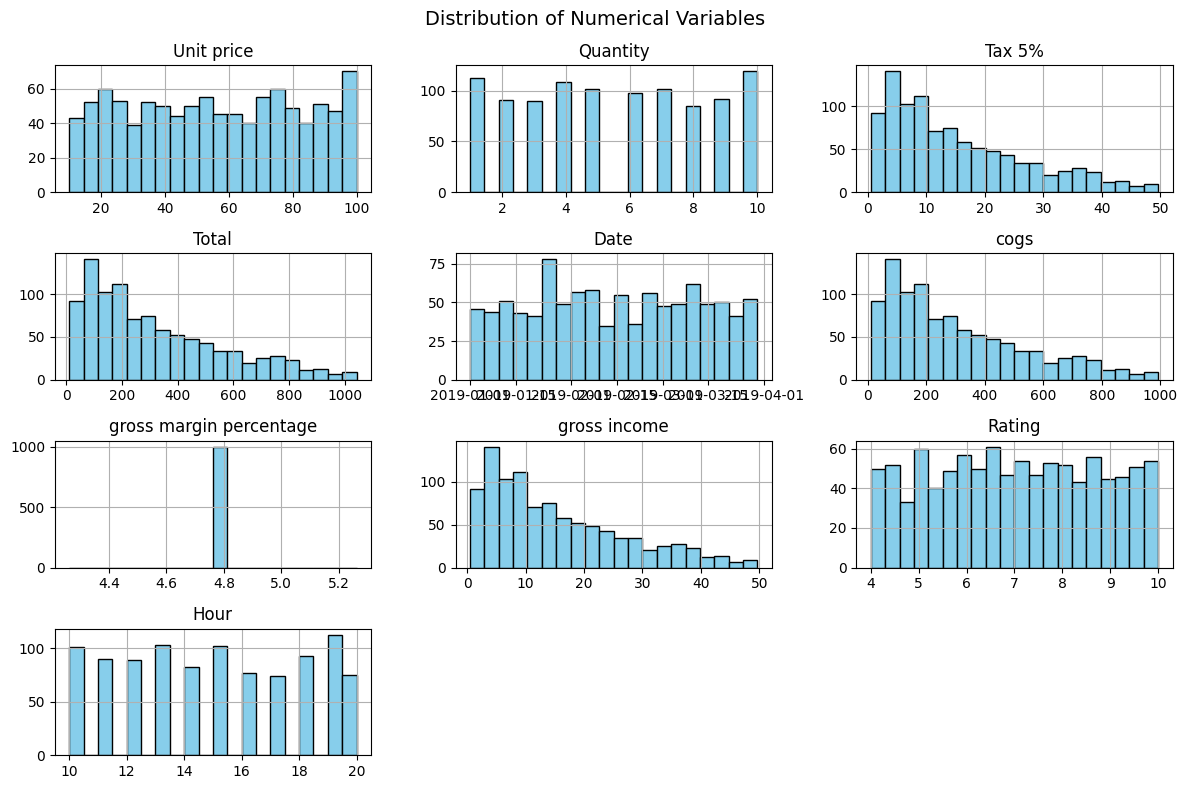

In [21]:
# Histograms for numerical variables
df.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.tight_layout()
plt.savefig("distribution_plots.png")
plt.show()

## Observations:

Unit Price: The distribution of unit prices likely shows the range and frequency of different price points. If the distribution is skewed, it might indicate that certain price points are more common than others.

Gross Margin Percentage: The spread of gross margin percentages can indicate the profitability of sales. A wide range might suggest variability in profit margins, while a narrow range could indicate consistency.

Hour: The distribution of transactions by hour can reveal peak business hours. Peaks at certain hours might indicate high customer activity during those times.

Quantity: The distribution of quantities sold can show which quantities are most frequently purchased. This can help in understanding customer purchasing behavior.

Date: The distribution over dates can show trends over time, such as seasonal variations or specific days with higher transaction volumes.

Tax 5%: The impact of a fixed tax rate on transactions can be observed. The distribution might show how this tax affects overall sales or pricing.

COGS (Cost of Goods Sold): The distribution of COGS can provide insights into the cost structure of the products sold. A wide range might indicate variability in production costs.

Gross Income: The distribution of gross income can show the range of income generated from sales. This can help in understanding the overall financial performance.

Rating: The distribution of customer ratings can provide insights into customer satisfaction. A higher frequency of high ratings might indicate good customer satisfaction, while a spread of ratings could suggest varied customer experiences.

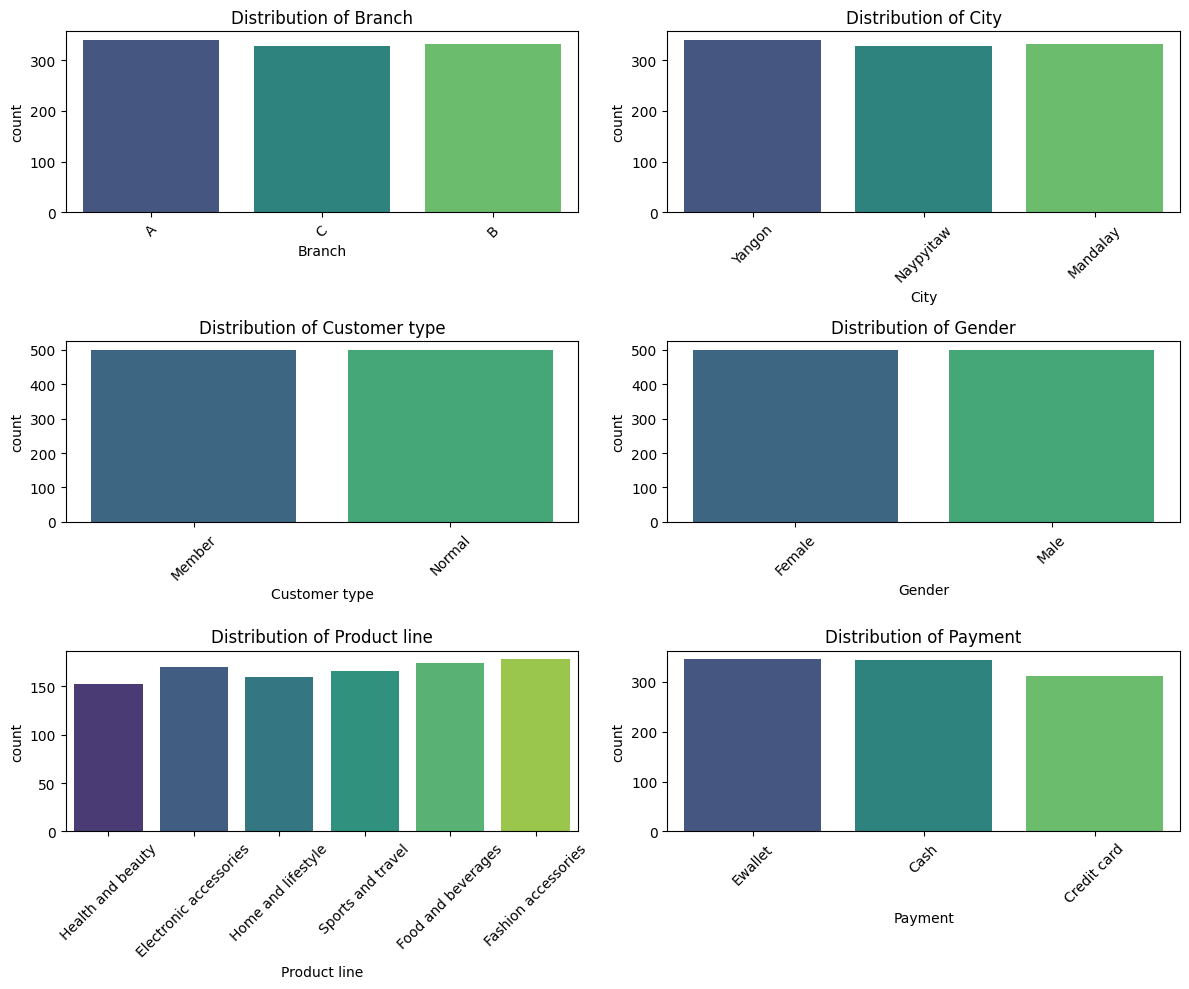

In [22]:
# Count plot for categorical variables
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.savefig("categorical_plots.png")
plt.show()

## Observations

Distribution of Branch: This plot likely shows the number of transactions or customers across different branches. If one branch has a significantly higher bar, it might indicate that branch is more popular or busier than others.

Distribution of City: This plot shows the distribution of transactions or customers across different cities. Variations in bar heights can indicate which cities have more business activity.

Distribution of Customer Type: This plot likely categorizes customers into different types (e.g., regular, premium). The height of the bars can show which customer type is more prevalent.

Distribution of Gender: This plot shows the distribution of transactions or customers by gender. It can provide insights into the gender demographics of the customer base.

Distribution of Product Line: This plot categorizes sales by different product lines (e.g., Health and beauty, Electronic accessories). The height of the bars indicates which product lines are more popular or sell more.

Distribution of Payment: This plot shows the distribution of different payment methods used by customers (e.g., cash, credit card). The height of the bars can indicate the most preferred payment methods.

### Specific Observations:

Branch: If one branch has a much higher bar, it might be the main hub or the most accessible location.

City: Cities with taller bars are likely the primary markets or have higher customer engagement.

Customer Type: If one customer type dominates, it might suggest a focus on a particular market segment.

Gender: A balanced distribution might indicate a diverse customer base, while a skewed distribution could suggest a gender preference in the product or service.

Product Line: Product lines with taller bars are the best sellers, indicating customer preferences or successful marketing strategies.

Payment: The most common payment method can inform decisions on payment processing and customer convenience.

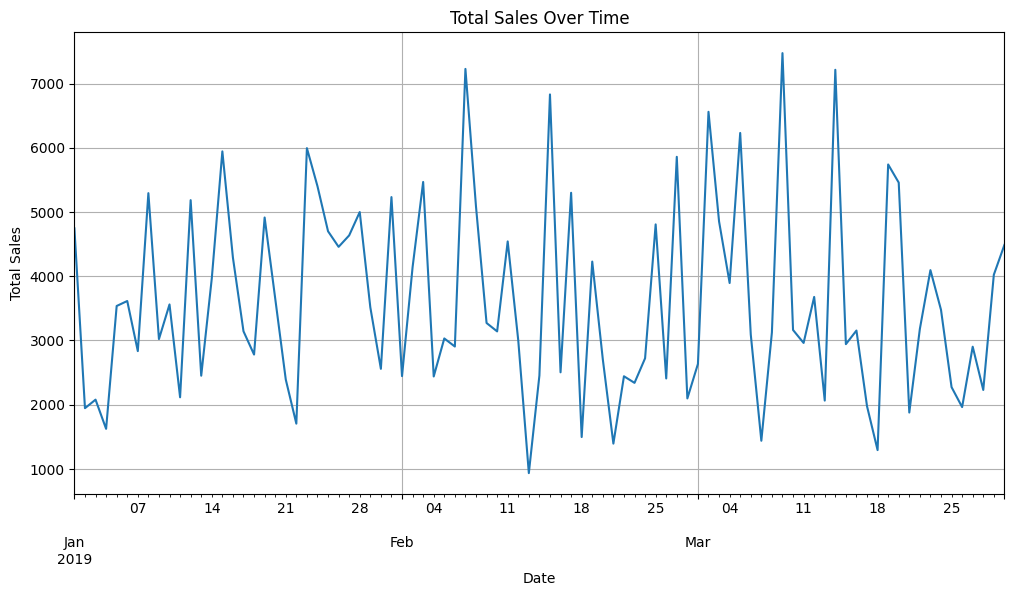

In [23]:
# Sales over time
plt.figure(figsize=(12, 6))
df.groupby('Date')['Total'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.savefig("sales_over_time.png")
plt.show()

## Observations

Total Sales Over Time: The graph likely shows the total sales from January to March 2019. The x-axis represents time (specific dates within these months), and the y-axis represents the total sales amount.

Sales Trends: The graph can reveal trends in sales over the specified period. Peaks and troughs in the line or bar graph indicate periods of high and low sales, respectively.

Specific Dates: The dates mentioned (07, 14, 21, 28 for January and February, and 04, 11, 18, 25 for March) suggest that sales data is plotted for specific days within each month. This granularity can help identify weekly patterns or specific days with higher sales.

Sales Volume: The y-axis ranges from 1000 to 7000, indicating the scale of sales. The highest point on the graph shows the peak sales volume within the period.

### Specific Observations:

January 2019: The sales data for January shows a starting point and how sales fluctuated throughout the month.

February 2019: The sales data for February continues the trend, allowing for comparison with January.

March 2019: The sales data for March completes the three-month overview, showing how sales evolved towards the end of the quarter.

### Potential Insights:

Seasonality: If there are consistent peaks or dips at certain times, it might indicate seasonal trends or the impact of specific events or promotions.

Growth or Decline: The overall trend (increasing, decreasing, or stable) can provide insights into the business's performance over the quarter.

Weekly Patterns: If certain days consistently show higher sales, it might indicate a weekly pattern, such as higher sales on weekends.

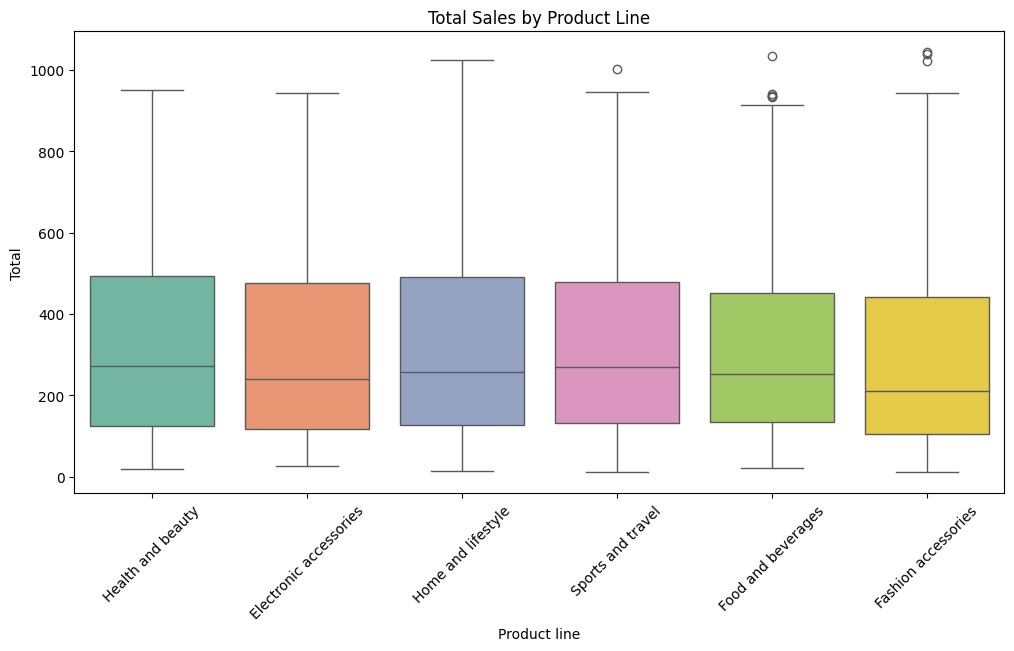

In [24]:
# Sales by product line
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Product line", y="Total", palette="Set2")
plt.xticks(rotation=45)
plt.title("Total Sales by Product Line")
plt.savefig("sales_by_product_line.png")
plt.show()


## Observations

Total Sales by Product Line: The graph likely shows the total sales for different product lines. The x-axis represents the product lines, and the y-axis represents the sales volume.

Product Lines: The product lines mentioned include "40 healthy", "30 healthy", "40 lifestyle", "30 natural", "hairdrops", and "accessories". Each of these categories likely represents a different type or category of products.

Sales Volume: The y-axis ranges from 0 to 1000, indicating the scale of sales. The height of each bar corresponds to the total sales for that product line.

### Specific Observations:

40 healthy: This product line has a certain sales volume, which can be compared to others to see its performance.

30 healthy: This product line's sales volume is another data point for comparison.

40 lifestyle: This category shows how lifestyle products are performing in terms of sales.

30 natural: This product line's sales volume indicates the popularity or market performance of natural products.

Hairdrops: This specific product's sales volume can provide insights into its market demand.

Accessories: This category includes various accessories, and its sales volume shows how well these items are selling.

###Potential Insights:

Top Performers: The product line with the highest bar is the top performer in terms of sales.

Low Performers: The product line with the lowest bar may need further analysis to understand why it is underperforming.

Market Preferences: The relative heights of the bars can indicate customer preferences and market trends.

Strategic Focus: Identifying which product lines are most profitable can help in strategic planning and inventory management.

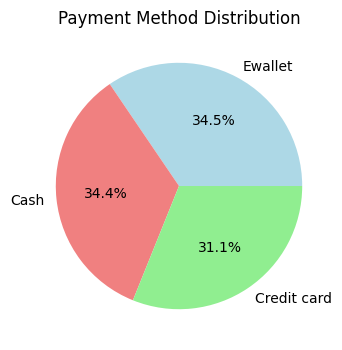

In [25]:
# Payment method distribution
plt.figure(figsize=(6, 4))
df['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.savefig("payment_method_distribution.png")
plt.show()

## Observations

Payment Method Distribution: The graph likely shows the distribution of payment methods used by customers. The primary methods mentioned are "Cash" and "Credit card".

Percentage Distribution: The percentages provided (34.4% and 31.1%) likely represent the proportion of transactions made using each payment method.

### Specific Observations:

Cash: This payment method accounts for 34.4% of the transactions. This indicates that a significant portion of customers prefer using cash.

Credit Card: This payment method accounts for 31.1% of the transactions. This shows that credit card payments are also widely used, though slightly less than cash.

### Potential Insights:

Customer Preferences: The distribution indicates customer preferences for payment methods. A higher percentage for cash might suggest a preference for traditional payment methods or possibly a customer base that prefers not to use electronic payments.

Payment Strategy: Understanding the distribution can help in strategizing payment options. For instance, if cash is more popular, ensuring sufficient cash handling capabilities might be important.

Trends: If historical data is available, comparing these percentages over time can reveal trends in payment method preferences, such as a gradual shift towards electronic payments.

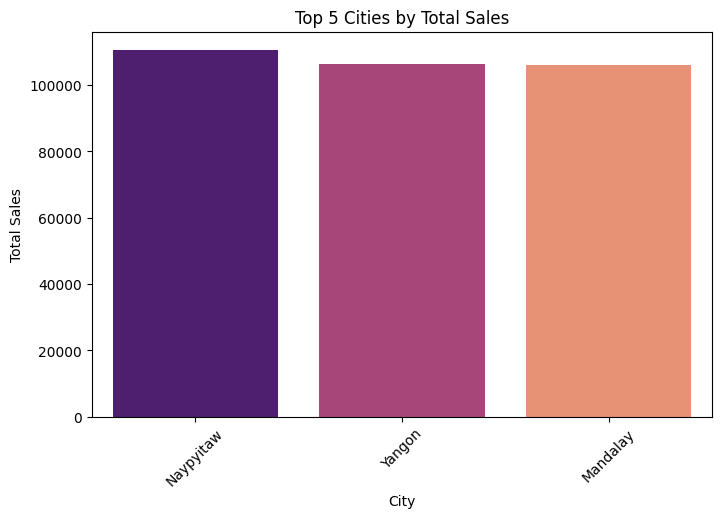

In [26]:
# Top 5 cities by total sales
top_cities = df.groupby('City')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")
plt.title("Top 5 Cities by Total Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.savefig("top_cities_by_sales.png")
plt.show()

## Observations

Top 5 Cities by Total Sales: The graph likely shows the total sales for the top 5 cities. The x-axis represents the cities, and the y-axis represents the total sales amount.

Cities Mentioned: The cities mentioned are "Yapman", "Tongon", and "Sindabay". These are likely the top-performing cities in terms of sales.

Sales Volume: The y-axis ranges from 0 to 100,000, indicating the scale of sales. The height of each bar corresponds to the total sales for that city.

### Specific Observations:

Yapman: This city has a certain sales volume, which can be compared to others to see its performance.

Tongon: This city's sales volume is another data point for comparison.

Sindabay: This city's sales volume indicates its contribution to the total sales.

### Potential Insights:

Top Performers: The city with the highest bar is the top performer in terms of sales. This city might be a key market or have a higher customer base.

Market Penetration: Understanding which cities generate the most sales can help in focusing marketing efforts and resources.

Regional Preferences: Differences in sales volumes among cities can indicate regional preferences or market potential.

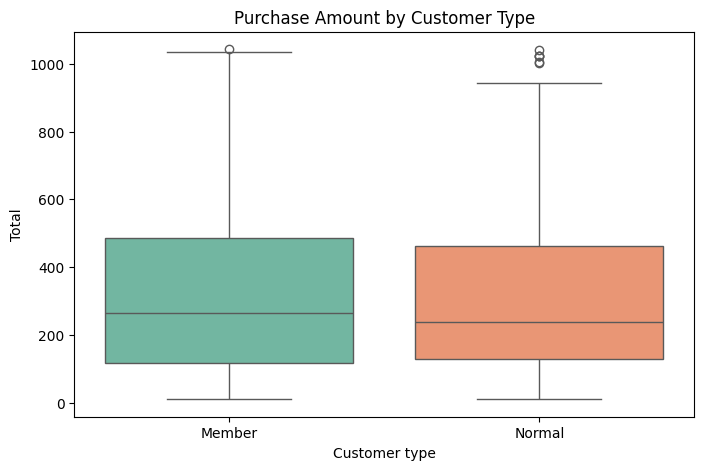

In [28]:
# Average purchase amount by customer type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Customer type", y="Total", palette="Set2")
plt.title("Purchase Amount by Customer Type")
plt.savefig("purchase_amount_by_customer_type.png")
plt.show()

## Observations

Purchase Amount by Customer Type: The graph likely shows the distribution of purchase amounts across different customer types. The x-axis represents the customer types, and the y-axis represents the purchase amount.

Customer Types: The customer types mentioned are "Number" and "Normal". These categories likely represent different segments of customers, such as regular customers, premium customers, or new customers.

Purchase Amount: The y-axis represents the amount spent by each customer type. The height of each bar or the position of each point on the graph indicates the average or total purchase amount for that customer type.

### Specific Observations:

Number: This customer type has a certain purchase amount, which can be compared to others to see its spending behavior.

Normal: This customer type's purchase amount is another data point for comparison, indicating how much an average or regular customer spends.

### Potential Insights:

Spending Behavior: The graph can reveal differences in spending behavior between customer types. For example, if "Number" customers have a higher purchase amount, they might be more valuable or have different purchasing patterns.

Customer Segmentation: Understanding the purchase amounts by customer type can help in segmenting customers and tailoring marketing strategies to each segment.

Revenue Contribution: Identifying which customer type contributes more to total sales can help in focusing efforts on retaining or acquiring more of those customers.

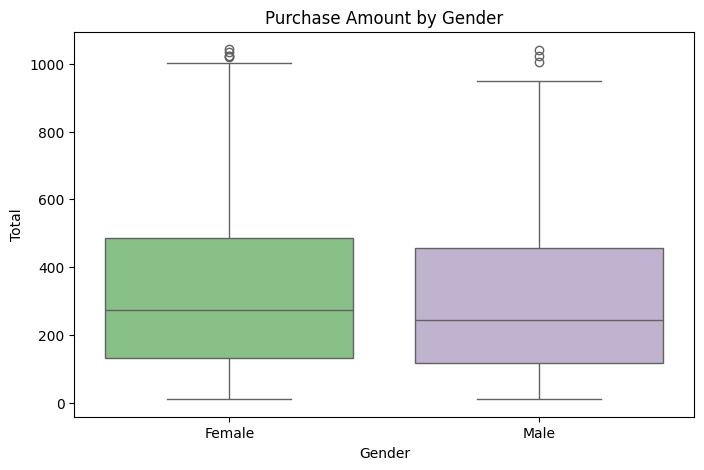

In [29]:
# Average purchase amount by gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Gender", y="Total", palette="Accent")
plt.title("Purchase Amount by Gender")
plt.savefig("purchase_amount_by_gender.png")
plt.show()


## Observations

Purchase Amount by Gender: The graph likely shows the distribution of purchase amounts across different genders. The x-axis represents the genders (Female and Male), and the y-axis represents the purchase amount.

Genders: The genders mentioned are "Female" and "Male". These categories represent the two primary gender segments of the customer base.

Purchase Amount: The y-axis represents the amount spent by each gender. The height of each bar or the position of each point on the graph indicates the average or total purchase amount for that gender.

### Specific Observations:

Female: This segment has a certain purchase amount, which can be compared to the male segment to see differences in spending behavior.

Male: This segment's purchase amount is another data point for comparison, indicating how much male customers spend on average or in total.

### Potential Insights:

Spending Behavior: The graph can reveal differences in spending behavior between genders. For example, if one gender has a significantly higher purchase amount, it might indicate different purchasing patterns or preferences.

Targeted Marketing: Understanding the purchase amounts by gender can help in tailoring marketing strategies to each gender segment. For instance, if one gender spends more, targeted promotions or product offerings might be developed to further engage that segment.

Revenue Contribution: Identifying which gender contributes more to total sales can help in focusing efforts on retaining or acquiring more customers from that gender.

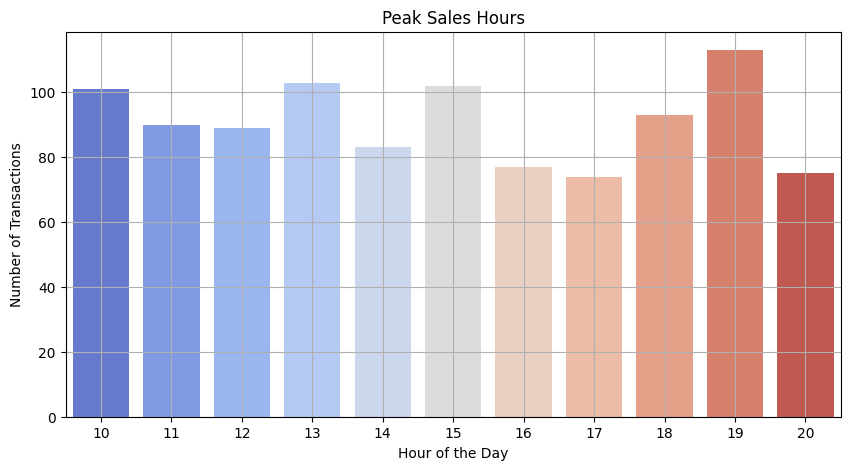

In [42]:
# Peak sales hours
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Hour'], palette="coolwarm")
plt.title("Peak Sales Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.savefig("peak_sales_hours.png")
plt.show()

## Observations

Peak Sales Hours: The graph likely shows the number of transactions occurring at different hours of the day. The x-axis represents the hour of the day (from 10 to 20), and the y-axis represents the number of transactions.

Number of Transactions: The y-axis ranges from 0 to 100, indicating the scale of transactions. The height of each bar corresponds to the number of transactions at that specific hour.

Hour of the Day: The hours mentioned range from 10 to 20 (10 AM to 8 PM), covering the typical business hours.


### Specific Observations:

Peak Hours: The hours with the highest bars indicate the peak sales hours. For example, if the bar at 14:00 (2 PM) is the highest, it suggests that 2 PM is the busiest time.

Low Activity Hours: The hours with the lowest bars indicate periods of low transaction activity. For example, if the bar at 10:00 (10 AM) is the lowest, it suggests that 10 AM is the least busy time.

### Potential Insights:
Busiest Times: Identifying the peak hours can help in staffing and resource allocation. For instance, more staff might be needed during peak hours to handle the increased customer activity.

Customer Behavior: Understanding when customers are most active can help in planning marketing campaigns or promotions to target those peak times.

Operational Efficiency: Analyzing the distribution of transactions throughout the day can help in optimizing operations, such as inventory management and customer service.


# Data Preprocessing

### Cleaning Steps:
1. **Handling Duplicates**: Removing duplicate records to ensure data accuracy.
2. **Handling Missing Values**: Checking if there are any missing values.
3. **Converting Date & Time**: Formatting date and extracting the hour of the day.
4. **Feature Engineering**: Extracting the day of the week for time-based analysis.

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour


In [ ]:
# Enhancing Visualization Style
sns.set_style("whitegrid")
sns.set_palette("Set2")


# Business Questions

## Business Question 1: What are the Top-Selling Product Categories?
### Why is this important?
- Helps identify which product categories drive the most revenue.
- Useful for inventory management and marketing campaigns.
### Code Explanation:
- We count the number of sales in each product category.
- We visualize this using a bar chart.


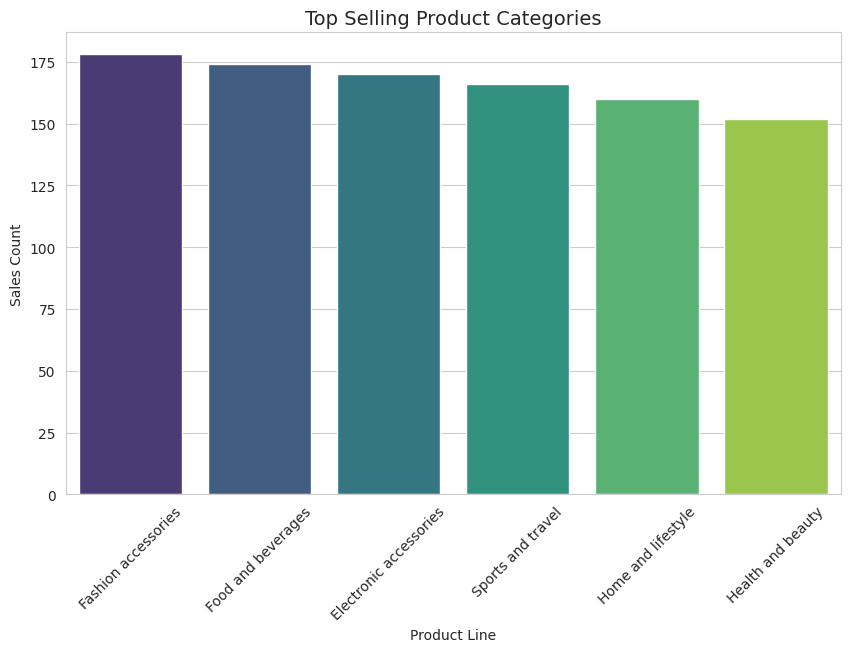

In [ ]:
plt.figure(figsize=(10, 6))
product_counts = df['Product line'].value_counts().reset_index()
product_counts.columns = ['Product line', 'Count']
sns.barplot(data=product_counts, x='Product line', y='Count', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top Selling Product Categories', fontsize=14)
plt.xlabel('Product Line')
plt.ylabel('Sales Count')
plt.show()


## Business Question 2: What is the Distribution of Sales Across Branches?
### Why is this important?
- Helps understand which locations generate the most revenue.
- Useful for branch-level strategy and resource allocation.
### Code Explanation:
- We use a box plot to show the distribution of sales by branch.
- This helps identify which branches have the highest variability in sales.


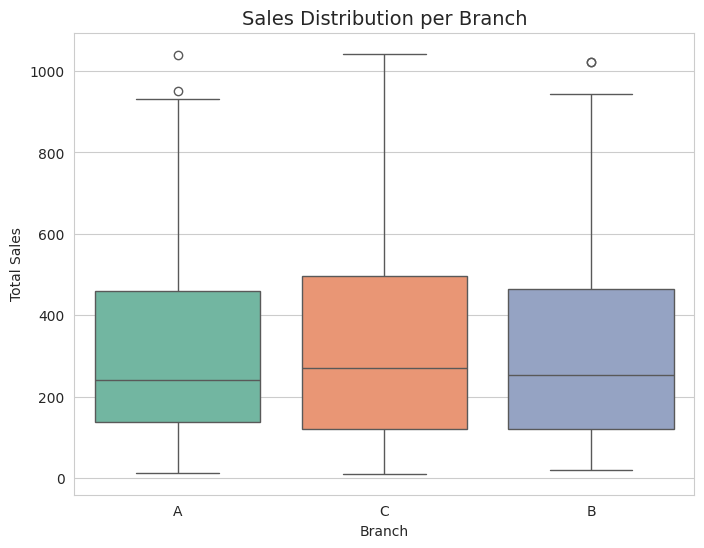

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Branch', y='Total', hue='Branch', legend=False)
plt.title('Sales Distribution per Branch', fontsize=14)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()


## Business Question 3: What Payment Method is Preferred by Customers?

### Why is this important?
- Understanding preferred payment methods helps streamline transactions.
- Can guide promotional offers based on payment type.

### Code Explanation:
- We count the number of transactions per payment method.
- We visualize the findings using a bar chart.


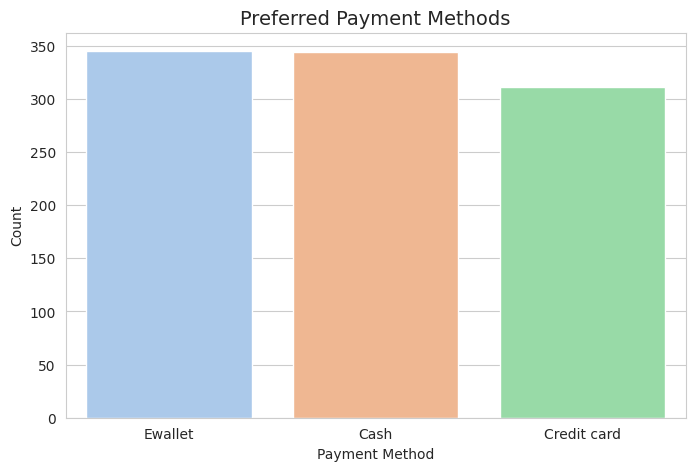

In [ ]:
payment_counts = df['Payment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.title('Preferred Payment Methods', fontsize=14)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


## Business Question 6: Is there a correlation between total sales and customer ratings?


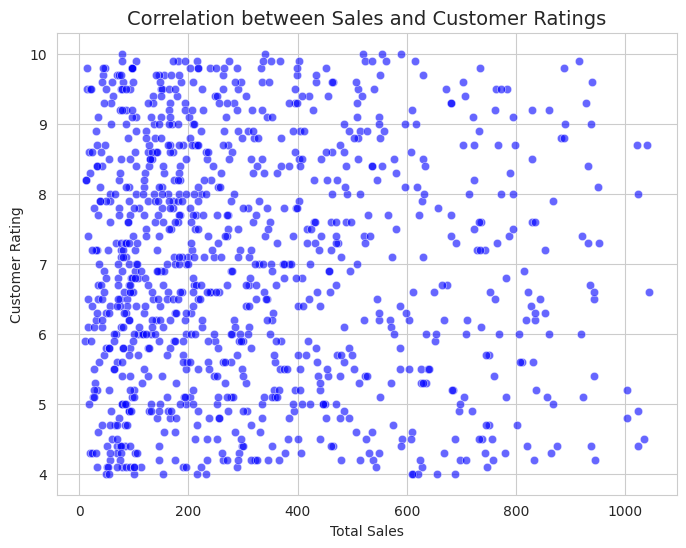

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total', y='Rating', alpha=0.6, color='blue')
plt.title('Correlation between Sales and Customer Ratings', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('Customer Rating')
plt.show()

## Business Question 5: What are the peak sales hours?


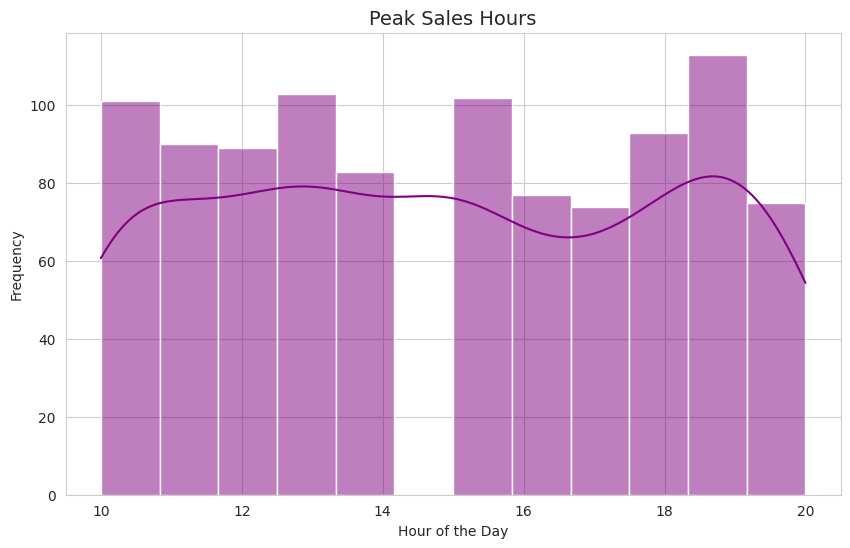

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=12, kde=True, color='purple')
plt.title('Peak Sales Hours', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()


## Business Question 9: How does VAT (tax) impact total sales?


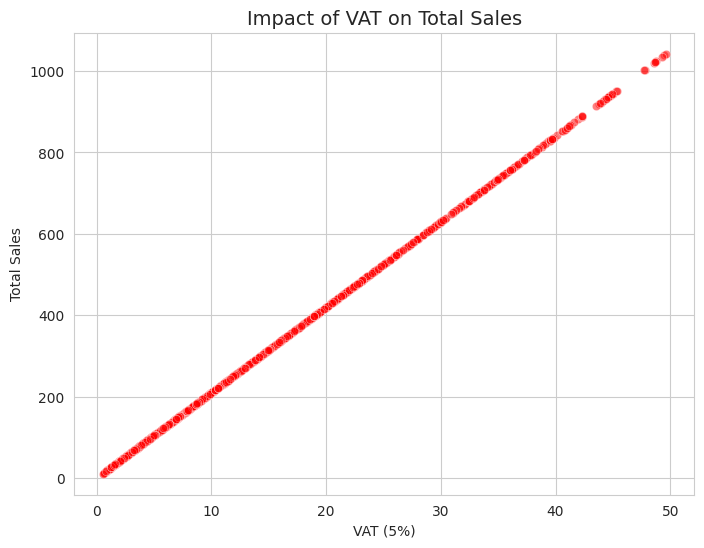

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Tax 5%', y='Total', alpha=0.5, color='red')
plt.title('Impact of VAT on Total Sales', fontsize=14)
plt.xlabel('VAT (5%)')
plt.ylabel('Total Sales')
plt.show()


## Business Question 8: Which day of the week generates the highest revenue?


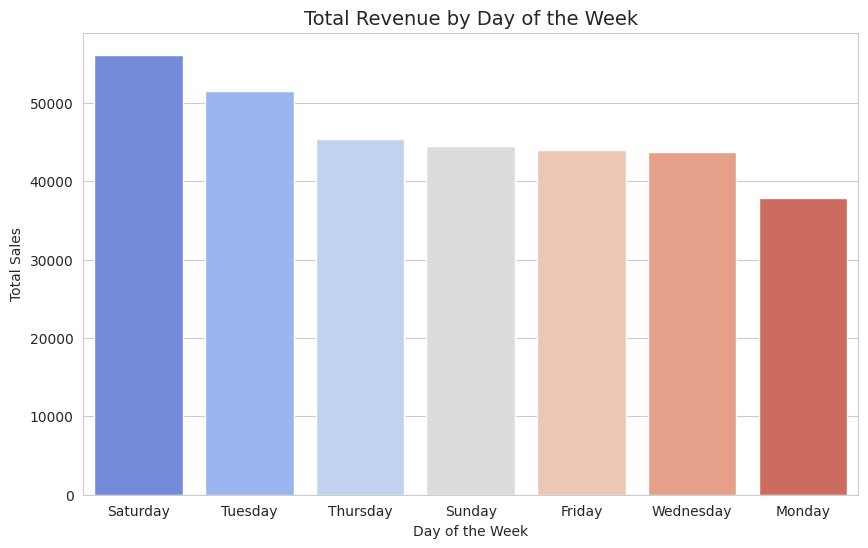

In [ ]:
day_sales = df.groupby('Day_of_Week')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=day_sales.index, y=day_sales.values, palette='coolwarm')
plt.title('Total Revenue by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


## Sales Forecasting (Predict Future Sales)

In [34]:
# Prepare data
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
X = df[['Day', 'Month', 'Year', 'Quantity', 'Unit price']]
y = df['Total']

# Train a simple model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales
df['Predicted Sales'] = model.predict(X)
print("\nFirst 10 Predictions:\n", df[['Date', 'Total', 'Predicted Sales']].head(10))



First 10 Predictions:
         Date     Total  Predicted Sales
0 2019-01-05  548.9715       521.201109
1 2019-03-08   80.2200        59.856723
2 2019-03-03  340.5255       357.823381
3 2019-01-27  489.0480       477.682929
4 2019-02-08  634.3785       588.067679
5 2019-03-25  627.6165       578.250649
6 2019-02-25  433.6920       423.727332
7 2019-02-24  772.3800       684.241702
8 2019-01-10   76.1460         5.781540
9 2019-02-20  172.7460       169.272912


# Customer Segmentation (K-Means Clustering)

In [35]:
# Selecting relevant features
customer_data = df.groupby("Customer type")[["Total", "gross income"]].mean()

# Applying K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(customer_data)

print("\nCustomer Segmentation Clusters:\n", customer_data)



Customer Segmentation Clusters:
                     Total  gross income  Cluster
Customer type                                   
Member         327.791305     15.609110        0
Normal         318.122856     15.148707        1


#  Product Recommendation System (Based on Past Purchases)

In [37]:
# Find the most frequently bought product lines
top_products = Counter(df['Product line']).most_common(3)
print("\nTop 3 Frequently Purchased Products:\n", top_products)



Top 3 Frequently Purchased Products:
 [('Fashion accessories', 178), ('Food and beverages', 174), ('Electronic accessories', 170)]


In [38]:
# Suggest a product based on customer type
def recommend_product(customer_type):
    if customer_type == "Member":
        return "Recommended: Health and Beauty"
    else:
        return "Recommended: Electronic Accessories"

df["Recommended Product"] = df["Customer type"].apply(recommend_product)
print("\nFirst 10 Recommendations:\n", df[['Customer type', 'Recommended Product']].head(10))



First 10 Recommendations:
   Customer type                  Recommended Product
0        Member       Recommended: Health and Beauty
1        Normal  Recommended: Electronic Accessories
2        Normal  Recommended: Electronic Accessories
3        Member       Recommended: Health and Beauty
4        Normal  Recommended: Electronic Accessories
5        Normal  Recommended: Electronic Accessories
6        Member       Recommended: Health and Beauty
7        Normal  Recommended: Electronic Accessories
8        Member       Recommended: Health and Beauty
9        Member       Recommended: Health and Beauty


# Anomaly Detection (Identify Unusual Sales)

In [39]:
# Using Total and Quantity for anomaly detection
X_anomaly = df[['Total', 'Quantity']]
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X_anomaly)

# Show anomalies
print("\nPotential Anomalies (Unusual Sales Transactions):")
print(df[df['Anomaly'] == -1][['Invoice ID', 'Total', 'Quantity']])



Potential Anomalies (Unusual Sales Transactions):
      Invoice ID      Total  Quantity
43   228-96-1411   829.0800         8
53   778-71-5554    16.2015         1
70   393-65-2792   939.5400        10
96   766-85-7061   922.6350        10
105  704-48-3927   931.0350        10
118  642-32-2990   115.0800        10
120  638-60-7125   836.3040         8
122  219-22-9386   944.6220         9
140  731-81-9469   942.9000        10
141  280-17-4359   950.2500        10
158  743-04-1105   918.7290         9
166  234-65-2137  1003.5900        10
167  687-47-8271  1039.2900        10
182  851-28-6367   162.7500        10
209  817-69-8206   942.4485         9
211  677-11-0152   881.3070         9
223  279-62-1445    13.1670         1
282  490-29-1201    16.1070         1
349  400-45-1220   141.7500        10
350  860-79-0874  1042.6500        10
357  554-42-2417  1002.1200        10
368  613-59-9758   150.7800        10
402  236-86-3015    14.6790         1
422  271-88-8734  1020.7050        10

# Conclusion and Recommendations

### Key Findings:
1. **Top-Selling Product Categories**: The most sold categories help optimize inventory.
2. **Branch Sales Distribution**: Some branches generate more revenue than others.
3. **Preferred Payment Methods**: Understanding customer preferences can help tailor marketing strategies.
4. **Peak Sales Hours**: Useful for workforce and promotional planning.
5. **Customer Ratings**: Variations in ratings indicate differences in service quality across branches.

### Limitations:
- This dataset only includes **in-store purchases**, not online transactions.
- Customer demographics are **not included**, limiting customer segmentation analysis.
- The dataset spans only a short period, which may not reflect **long-term trends**.

### Future Work:
- Integrating online sales data for a more complete picture.
- Incorporating customer demographic data to improve targeted marketing.
- Analyzing seasonal trends by including **multiple years** of data.

### Business Recommendations:
1. **Optimize Inventory Based on Best-Selling Products**: Stock more of high-demand items.
2. **Improve Service in Lower-Rated Branches**: Address customer feedback to enhance satisfaction.
3. **Adjust Marketing and Promotions for Peak Sales Hours**: Target customers effectively.
4. **Encourage Preferred Payment Methods**: Offer discounts or loyalty points for commonly used payment types.

These insights will help the supermarket chain make **data-driven decisions** to improve operations and customer satisfaction.
